<a href="https://colab.research.google.com/github/Rafaelnasario/desktop-tutorial/blob/case/desafio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Uma empresa do ramo de e-commerce quer levantar os indicadores de
recência, frequência e ticket médio (RFM) dos seus clientes.

A saber RFM:

R (Recency): Tempo que o cliente realizou a última compra (em dias).

F (Frequency): Quantidade de compras realizadas pelo cliente.

M (Monetary): Valor do ticket médio gasto pelo cliente.

Onde ticket médio = média do total gasto por pedido para cada cliente.

Para chegar nestes resultado iremos seguir os passo:

1. Leia o arquivo e inspecione os dados
2. EValores faltantes na identificação do cliente

3. Preços unitários e quantidade de produtos
iguais ou inferior a 0

4. Verifique se existem linhas duplicadas
5.  Tipos de dados da coluna
6. Tratando os outliers
7. Crie uma coluna adicional
8. Plotando gráficos
9. Cálculo do RFM



In [ ]:
# importando as bibliotecas

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# importando base

df = pd.read_csv('/content/data.csv', error_bad_lines=False , sep=',', encoding='latin-1')

<ipython-input-55-837eba4ecef7>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/data.csv', error_bad_lines=False , sep=',', encoding='latin-1')


In [ ]:
# Primeira visualização da base

df.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
# verificando as distribuição dos dados

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# tipo dos dados

df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
#Verifique os valores nulos

df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [ ]:
# somando a quantidade de nulos

df_missing = (
  df.isna().sum() #subistitui por boleado e feito soma destes valores
  .to_frame('missing_count') # contagem valores nulos
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct')) #transformando estes valores em porcentagem
  .sort_values('missing_count', ascending=False) # ordenar valores
)

df_missing.style.format('{:.2%}', subset=['missing_pct']) # customizar tabela %

,missing_count,missing_pct
CustomerID,135080,24.93%
Description,1454,0.27%
InvoiceNo,0,0.00%
StockCode,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
Country,0,0.00%


In [ ]:
# removendo os valores nulos

df = df.dropna(subset=['CustomerID'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Removendo preços unitários e quantidade de produtos iguais ou inferior a 0

df = df[df['UnitPrice']>0]
df = df[df['Quantity']>0]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Identificar valores duplicados criando nova tabela

df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
# Identificar quantos valores duplicados há em cada duplicata
(
  df
 .groupby(df.columns.tolist(), dropna=False) # agrupando por valores duplicados
 .size() # contando tamanho dos grupos (linhas) duplicado
 .to_frame('n_duplicates') # transforma em coluna
 .query('n_duplicates>1') # filtro de mais de uma observaçao
 .sort_values('n_duplicates', ascending=False) #ordenar maior menor
 .head(5)
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
541266    21755     LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
538514    21756     BATH BUILDING BLOCK WORD            1        12/12/2010 14:27 5.95      15044.0    United Kingdom             6

In [ ]:
# Remover valores duplicados

df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# verificando tipo de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
# Corrigindo os tipos de dados da coluna

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)


In [ ]:
# verificando tipo de dados das colunas

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


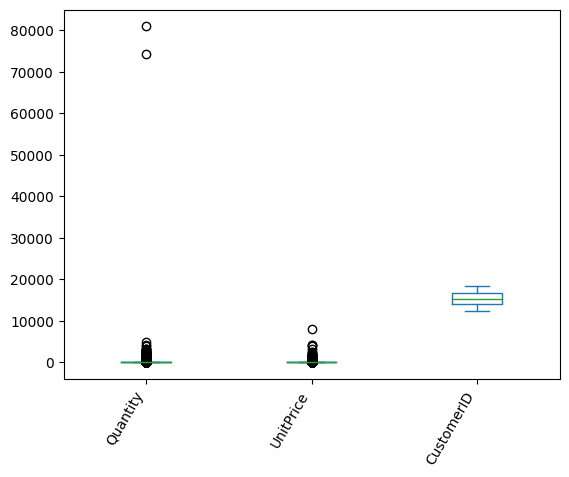

In [ ]:
# Box plot com dados de outliers

df.plot.box()
plt.xticks(rotation=60, ha='right');

In [ ]:
# removendo valores assima  quantidade do item na compra é superior a 10.000, e o preço unitário é maior que 5.000.

df = df[df['UnitPrice']  <5.000]
df = df[df['Quantity']  <10000]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


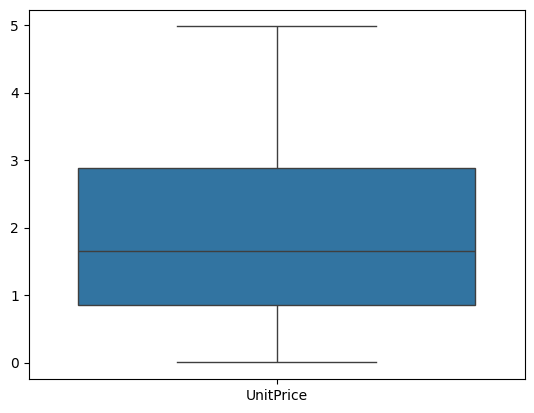

In [ ]:
# grafico box plot dos preços unitario

sns.boxplot(data=df.loc[:, ['UnitPrice']])

plt.show()

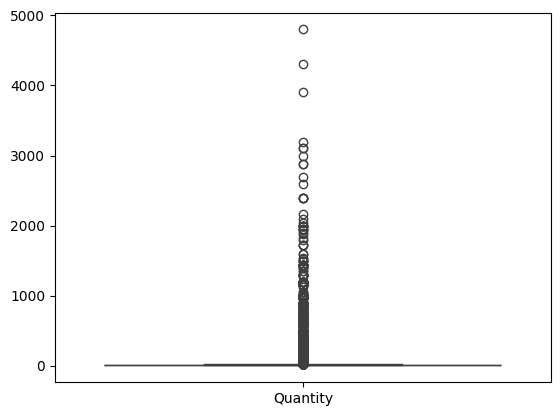

In [ ]:
# grafico box plot das quantidades

sns.boxplot(data=df.loc[:, ['Quantity']])

plt.show()

In [ ]:
# coluna adicional com o preço total da compra

df['totalCompra'] = df['Quantity'] * df['UnitPrice']

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalCompra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


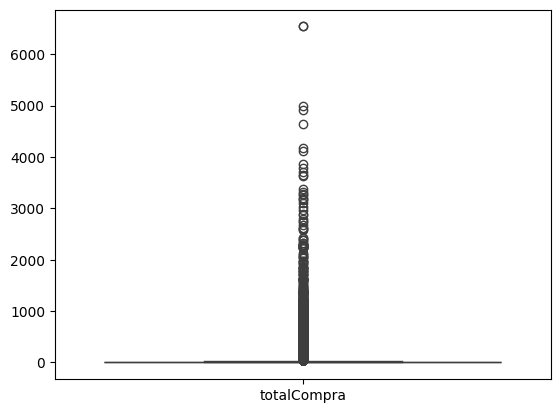

In [ ]:
# grafico box plot do valor total de cada compra

sns.boxplot(data=df.loc[:, ['totalCompra']])
plt.show()

In [ ]:
#  Encontrando a data mais recente na coluna da ultima compra

data_ultima_compra = df['InvoiceDate'].max()
print(data_ultima_compra)

2011-12-09 12:50:00


In [ ]:
# Top 10 países com maior valor em vendas

top_10_paises = df.groupby('Country')['totalCompra'].sum().nlargest(10)

top_10_paises.head(10)

Country
United Kingdom    5616769.814
Netherlands        262255.410
EIRE               192833.710
Germany            163761.580
France             156077.660
Australia          117368.840
Spain               43946.870
Switzerland         42493.000
Sweden              35452.230
Japan               34517.370
Name: totalCompra, dtype: float64

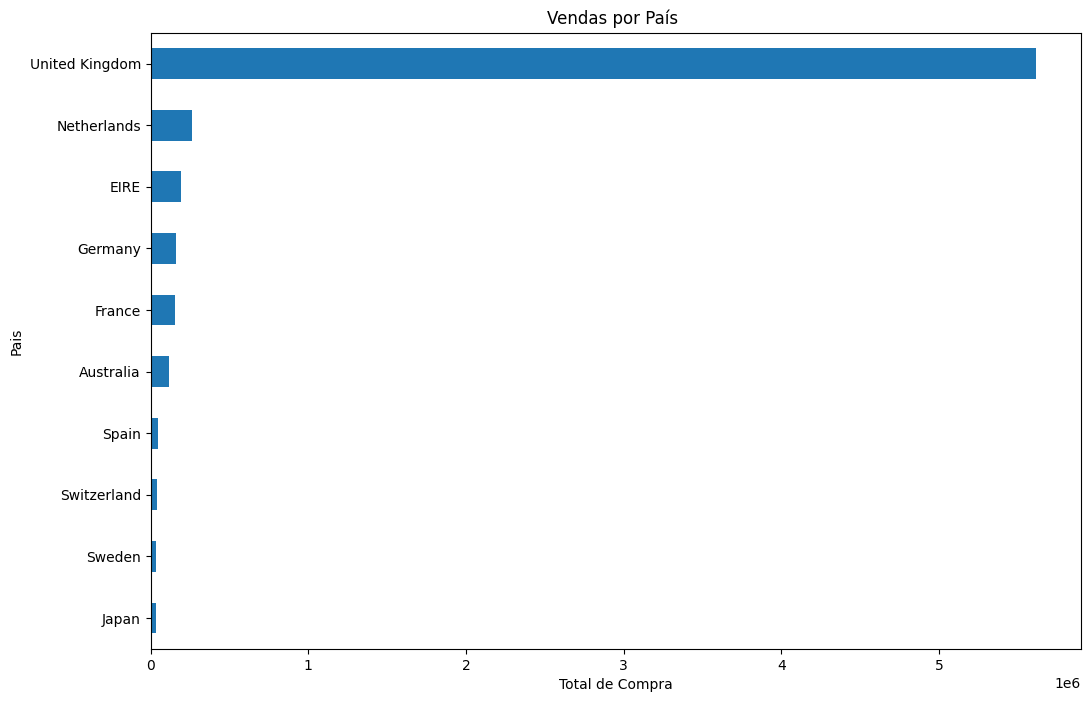

In [ ]:
# Grafico top 10 países com maior valor em vendas

top_10_paises = top_10_paises.sort_values(ascending=True)
top_10_paises.plot.barh(figsize=(12,8))

# Adicionando legenda

plt.xlabel('Total de Compra')
plt.ylabel('Pais')
plt.title('Vendas por País ')

plt.show()

In [ ]:
# Top 10 produtos mais vendidos

top_10_produtos = df.groupby('Description')['totalCompra'].sum().nlargest(10)

top_10_produtos.head(10)


Description
WHITE HANGING HEART T-LIGHT HOLDER    100367.09
JUMBO BAG RED RETROSPOT                85220.78
PARTY BUNTING                          68714.85
ASSORTED COLOUR BIRD ORNAMENT          56580.34
RABBIT NIGHT LIGHT                     51346.20
PAPER CHAIN KIT 50'S CHRISTMAS         41751.80
CHILLI LIGHTS                          39377.86
BLACK RECORD COVER FRAME               39012.33
JUMBO BAG PINK POLKADOT                37289.59
SPOTTY BUNTING                         35436.45
Name: totalCompra, dtype: float64

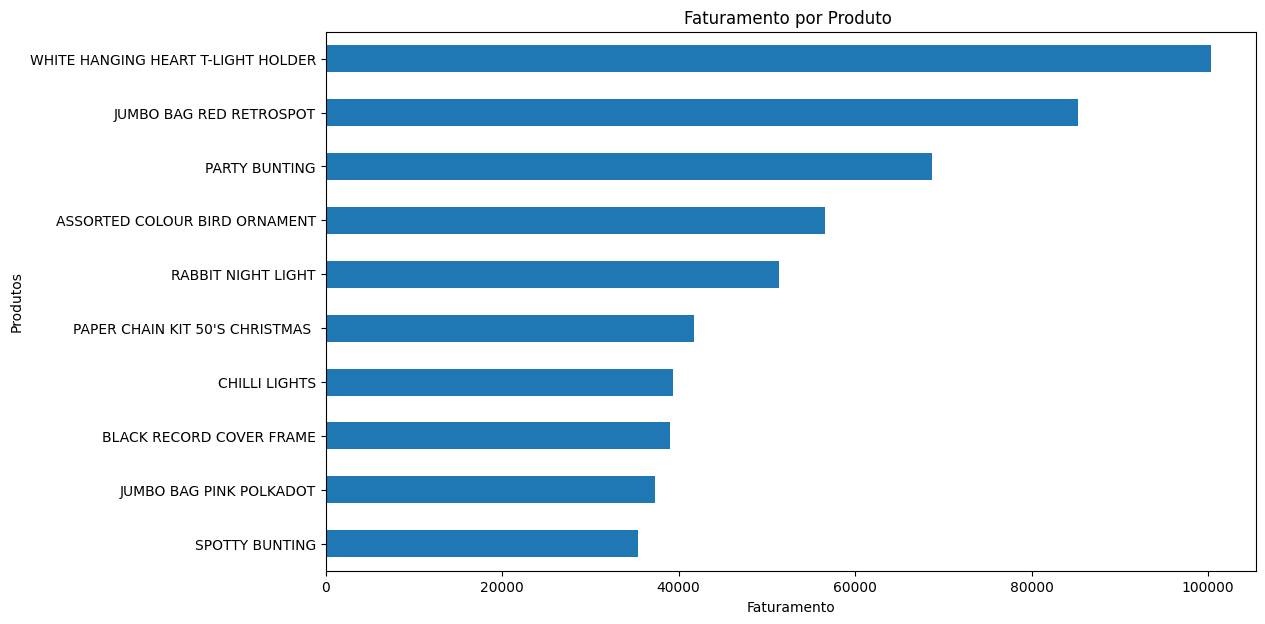

In [ ]:
# Grafico top 10 produtos mais vendidos

top_10_produtos = top_10_produtos.sort_values(ascending=True)
top_10_produtos.plot.barh(figsize=(12,7))

# Adicionando legenda

plt.xlabel('Faturamento')
plt.ylabel('Produtos')
plt.title('Faturamento por Produto ')

plt.show()

In [ ]:
# valor de venda total por mês

df['Mês'] = df['InvoiceDate'].dt.month

# Calculando a soma do faturamento por mês
soma_por_mes = df.groupby('Mês')['totalCompra'].sum()

soma_por_mes.head(12)

Mês
1     382899.670
2     348215.150
3     454968.470
4     364529.671
5     518309.910
6     496212.560
7     483793.931
8     537116.050
9     768083.242
10    809045.790
11    953957.710
12    736788.150
Name: totalCompra, dtype: float64

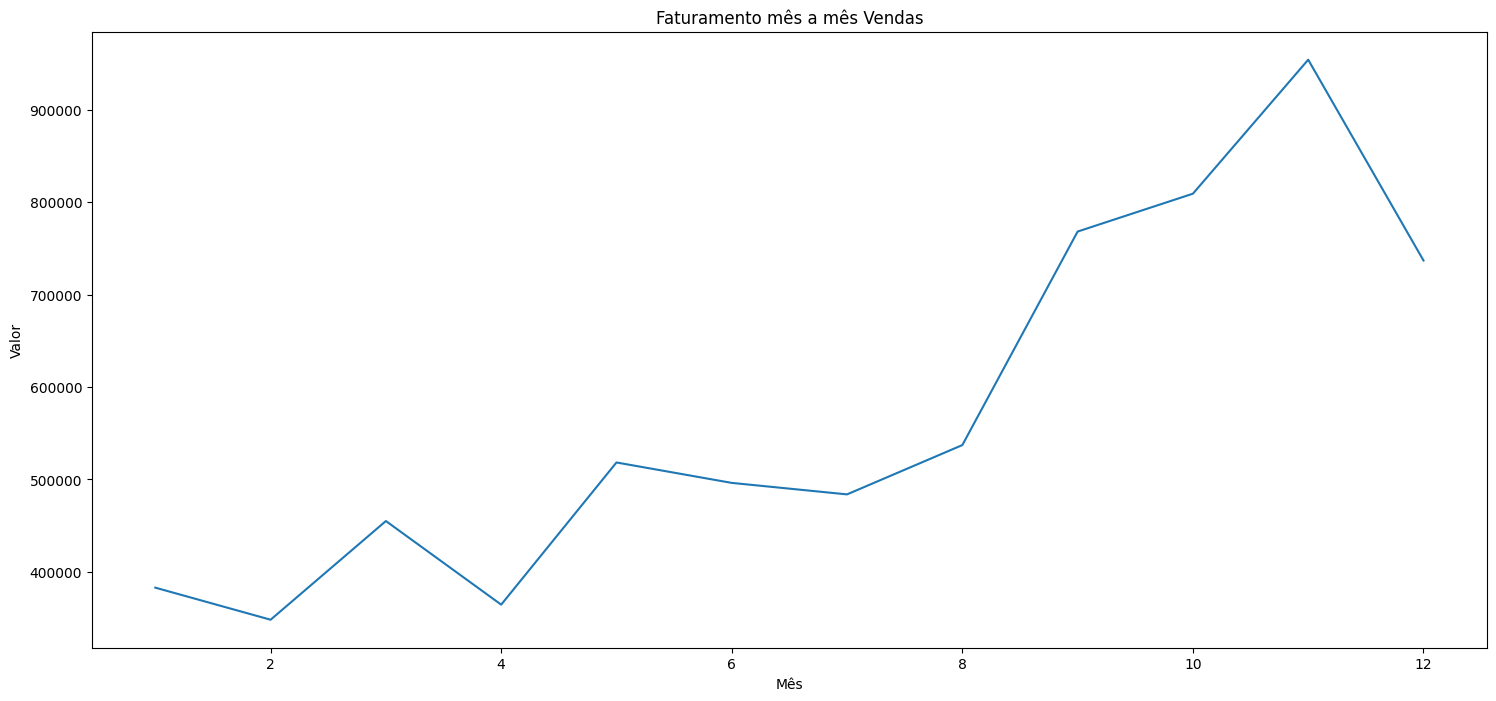

In [ ]:
# Grafico com valor de venda total por mês

plt.figure(figsize=(18,8))
soma_por_mes.plot();

plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Faturamento mês a mês Vendas')

plt.show()

In [ ]:
# Top 10 países com maior valor em vendas

top_10_paises = df.groupby('Country')['totalCompra'].sum().nlargest(10)

top_10_paises.head(10)

Country
United Kingdom    5616769.814
Netherlands        262255.410
EIRE               192833.710
Germany            163761.580
France             156077.660
Australia          117368.840
Spain               43946.870
Switzerland         42493.000
Sweden              35452.230
Japan               34517.370
Name: totalCompra, dtype: float64

In [ ]:
# Soma da vendas mes no United Kingdom

vendas_United_Kingdom = df[df['Country'] == 'United Kingdom'].groupby(df['InvoiceDate'].dt.month)['totalCompra'].sum()

vendas_United_Kingdom.head(12)

InvoiceDate
1     283175.300
2     275042.850
3     362758.090
4     323784.941
5     422386.190
6     385079.570
7     394154.491
8     416839.600
9     643934.192
10    654055.620
11    812349.760
12    643209.210
Name: totalCompra, dtype: float64

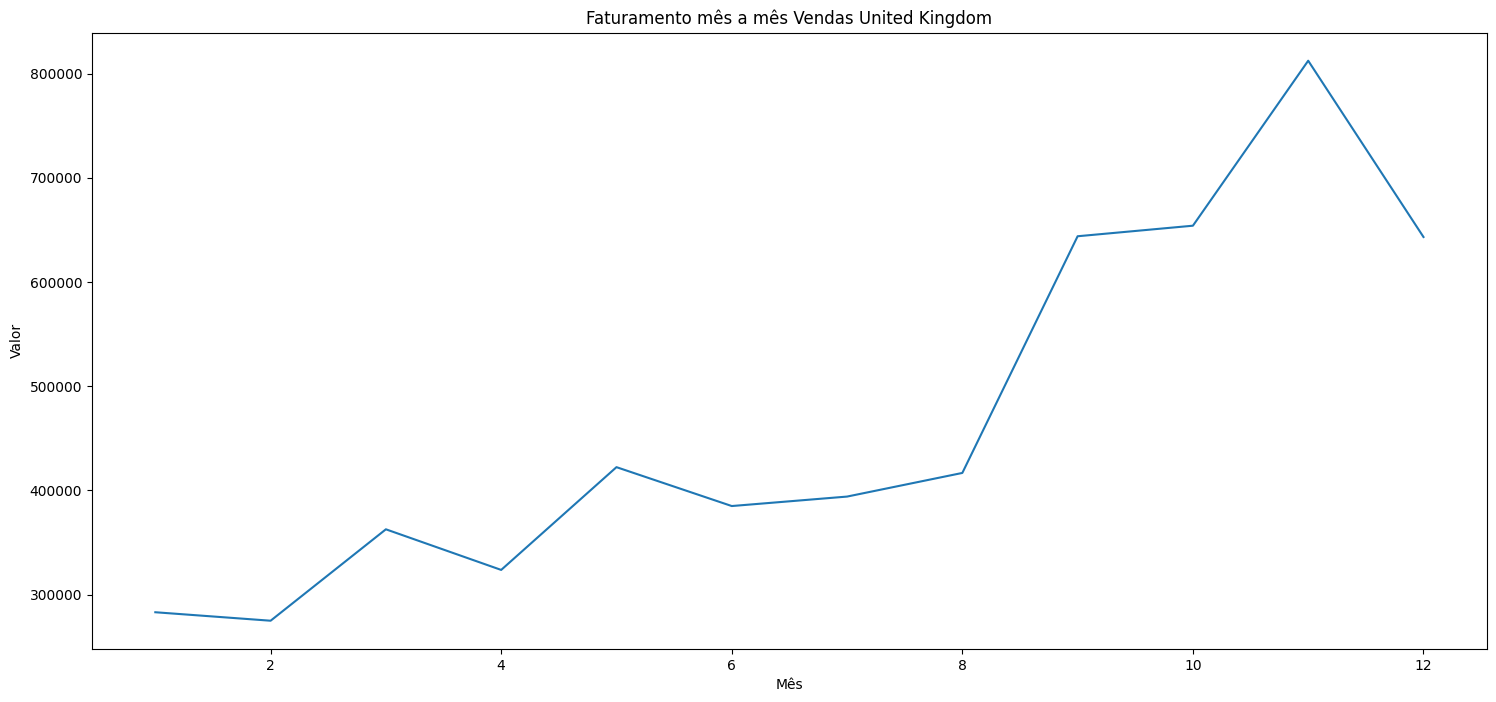

In [ ]:
# Grafico com valor de venda no United Kingdom por mês

plt.figure(figsize=(18,8))
vendas_United_Kingdom.plot();

plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Faturamento mês a mês Vendas United Kingdom')

plt.show()

In [ ]:
# Soma da vendas mes no Netherlands

vendas_Netherlands = df[df['Country'] == 'Netherlands'].groupby(df['InvoiceDate'].dt.month)['totalCompra'].sum()

vendas_Netherlands.head(12)

InvoiceDate
1     25218.66
2     21031.66
3     19985.14
4      2886.56
5     25457.58
6     25091.24
7        11.02
8     37675.03
9     25002.90
10    37182.06
11    23685.06
12    19028.50
Name: totalCompra, dtype: float64

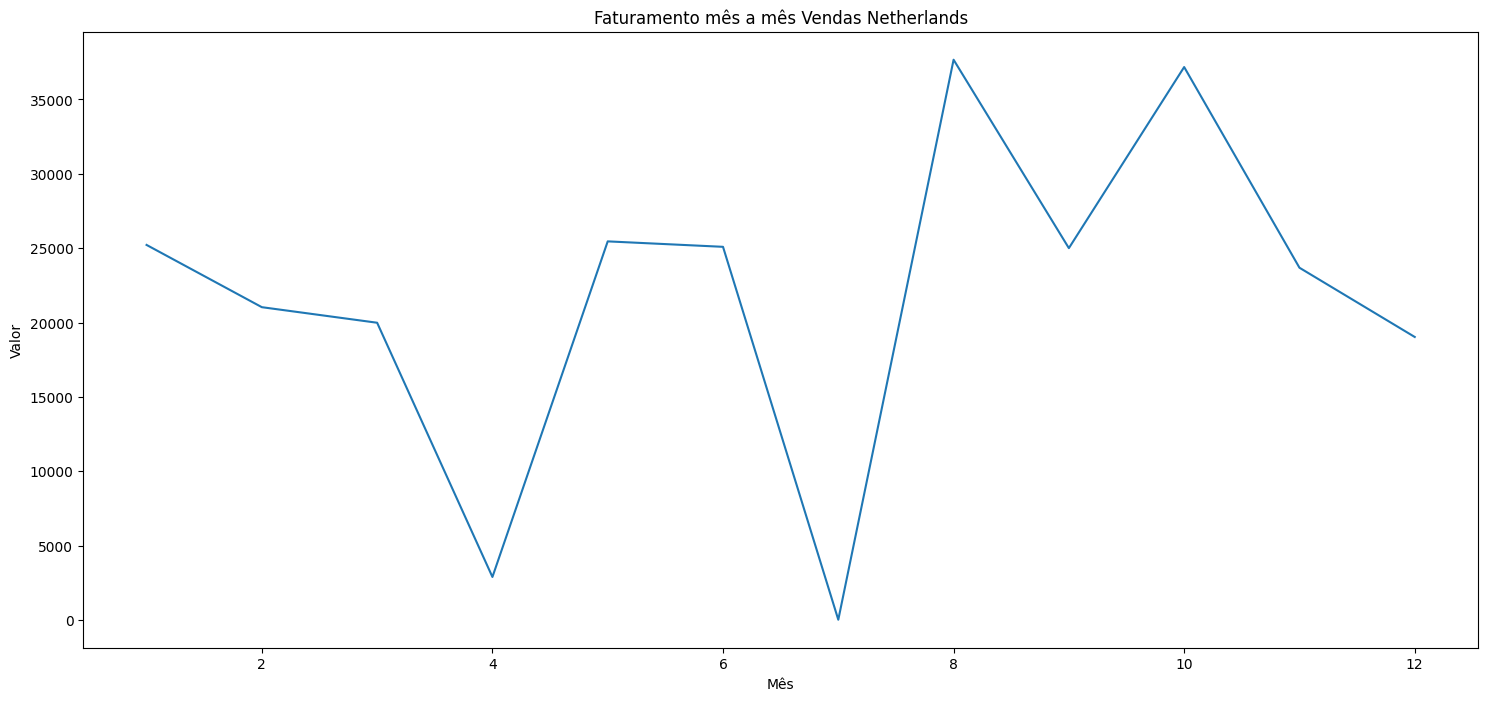

In [ ]:
# Grafico com valor de venda no Netherlands por mês

plt.figure(figsize=(18,8))
vendas_Netherlands.plot();

plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Faturamento mês a mês Vendas Netherlands')

plt.show()

In [ ]:
# Soma da vendas mes no EIRE

vendas_EIRE = df[df['Country'] == 'EIRE'].groupby(df['InvoiceDate'].dt.month)['totalCompra'].sum()

vendas_EIRE.head(12)

InvoiceDate
1     16288.20
2      7170.02
3     11906.02
4      6206.75
5      9379.01
6     15773.89
7     31661.65
8     12922.58
9     31450.72
10    17046.27
11    22363.20
12    10665.40
Name: totalCompra, dtype: float64

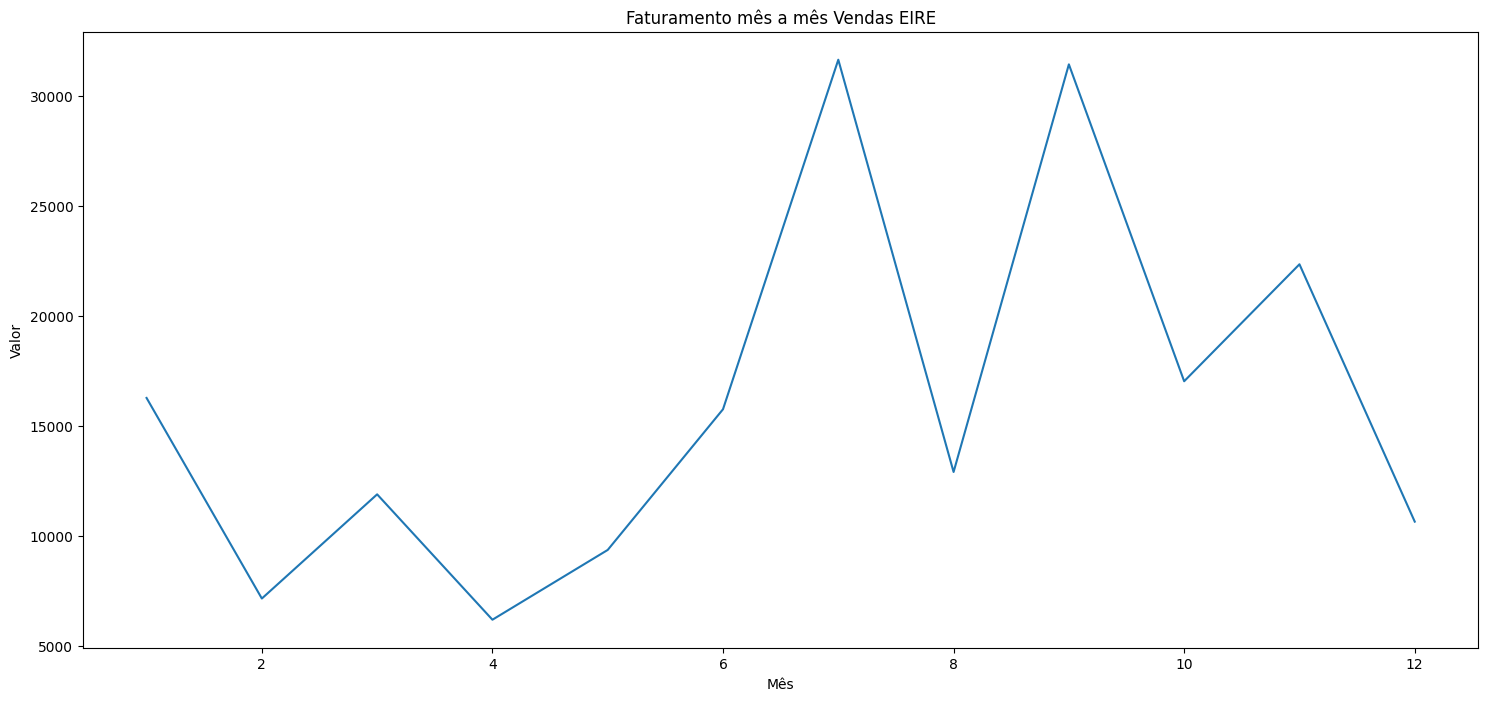

In [ ]:
# Grafico com valor de venda no EIRE por mês

plt.figure(figsize=(18,8))
vendas_EIRE.plot();

plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Faturamento mês a mês Vendas EIRE')

plt.show()

In [ ]:
# Soma da vendas mes no Germany

vendas_Germany = df[df['Country'] == 'Germany'].groupby(df['InvoiceDate'].dt.month)['totalCompra'].sum()

vendas_Germany.head(12)

InvoiceDate
1     12016.94
2      6795.75
3     10313.79
4      8566.24
5     20281.24
6     10038.65
7     11715.05
8     13373.37
9     14256.17
10    22504.97
11    19163.30
12    14736.11
Name: totalCompra, dtype: float64

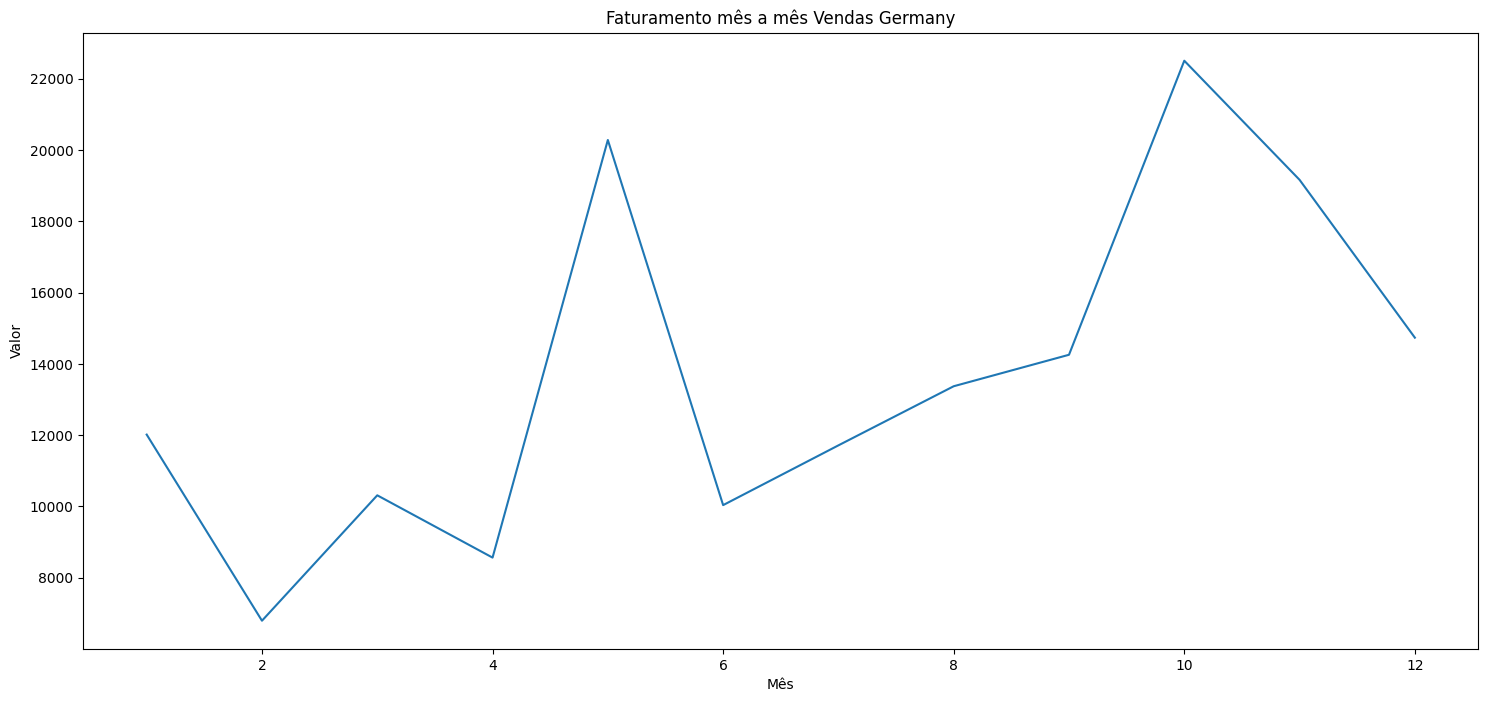

In [ ]:
# Grafico com valor de venda no Germany por mês

plt.figure(figsize=(18,8))
vendas_Germany.plot();

plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Faturamento mês a mês Vendas Germany')

plt.show()

In [ ]:
# Soma da vendas mes no France

vendas_France = df[df['Country'] == 'France'].groupby(df['InvoiceDate'].dt.month)['totalCompra'].sum()

vendas_France.head(12)

InvoiceDate
1     13074.27
2      6409.76
3     11850.70
4      3338.41
5     13706.00
6     12481.32
7      8141.84
8     11388.26
9     17813.20
10    20997.88
11    24166.79
12    12709.23
Name: totalCompra, dtype: float64

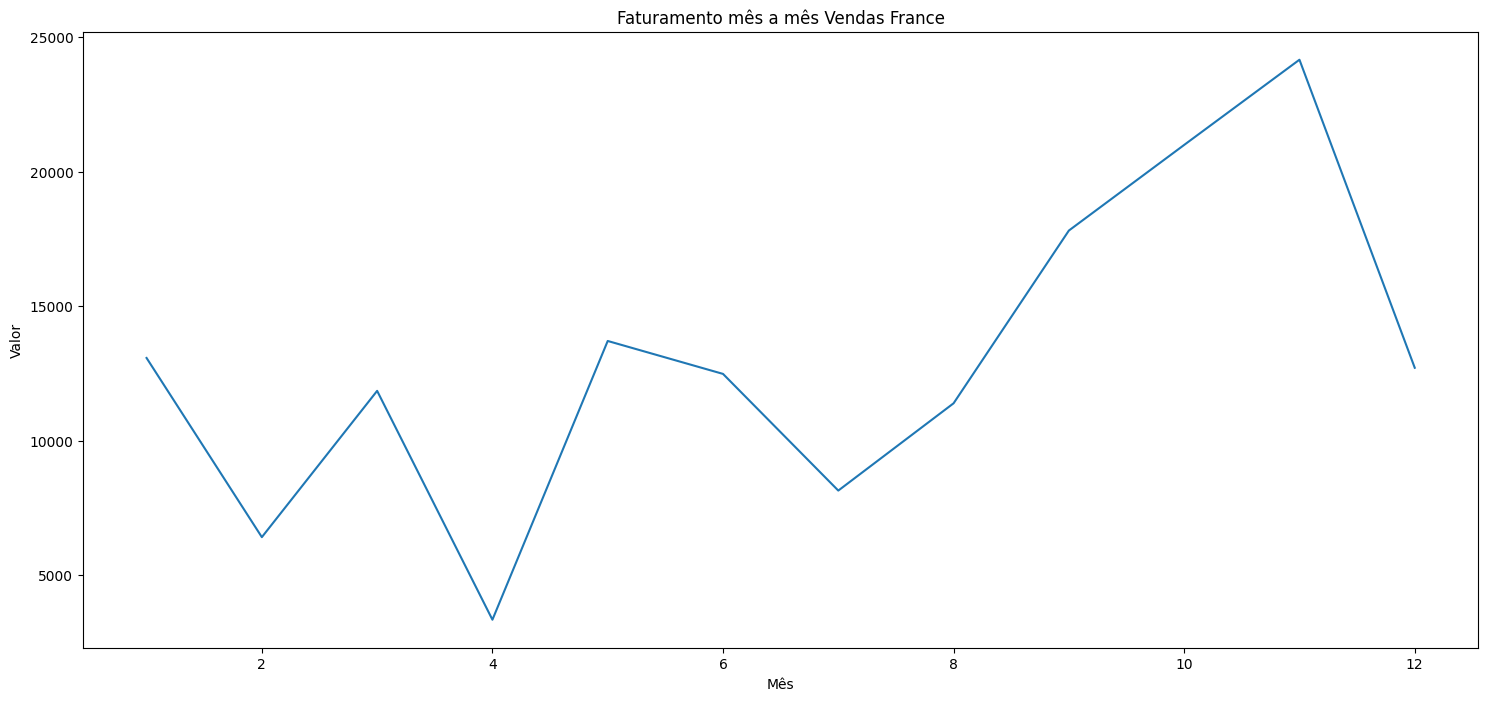

In [ ]:
# Grafico com valor de venda no France por mês

plt.figure(figsize=(18,8))
vendas_France.plot();

plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Faturamento mês a mês Vendas France')

plt.show()

In [ ]:
# Soma da vendas mes no Australia

vendas_Australia = df[df['Country'] == 'Australia'].groupby(df['InvoiceDate'].dt.month)['totalCompra'].sum()

vendas_Australia.head(12)

InvoiceDate
1      8404.51
2     12268.57
3     12542.49
4       421.60
5     11842.51
6     23555.40
7      4587.93
8     19935.60
9      4982.48
10    11173.23
11     7100.52
12      554.00
Name: totalCompra, dtype: float64

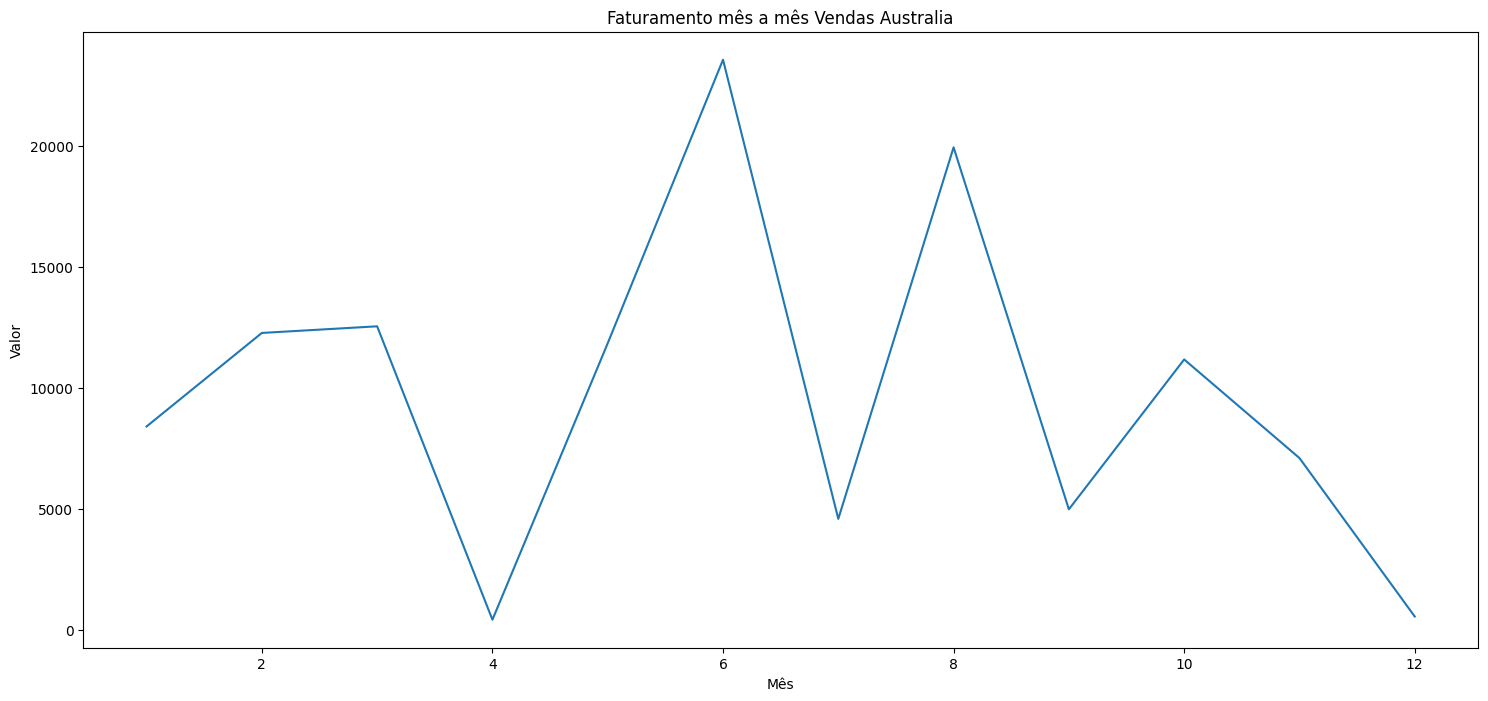

In [ ]:
# Grafico com valor de venda no Australia por mês

plt.figure(figsize=(18,8))
vendas_Australia.plot();

plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Faturamento mês a mês Vendas Australia')

plt.show()

In [ ]:
# Soma da vendas mes no Spain

vendas_Spain = df[df['Country'] == 'Spain'].groupby(df['InvoiceDate'].dt.month)['totalCompra'].sum()

vendas_Spain.head(12)

InvoiceDate
1     7913.84
2     1283.10
3     3580.75
4     1352.90
5     1567.35
6     2080.56
7     6575.12
8     2344.26
9     3471.49
10    5140.80
11    7072.51
12    1564.19
Name: totalCompra, dtype: float64

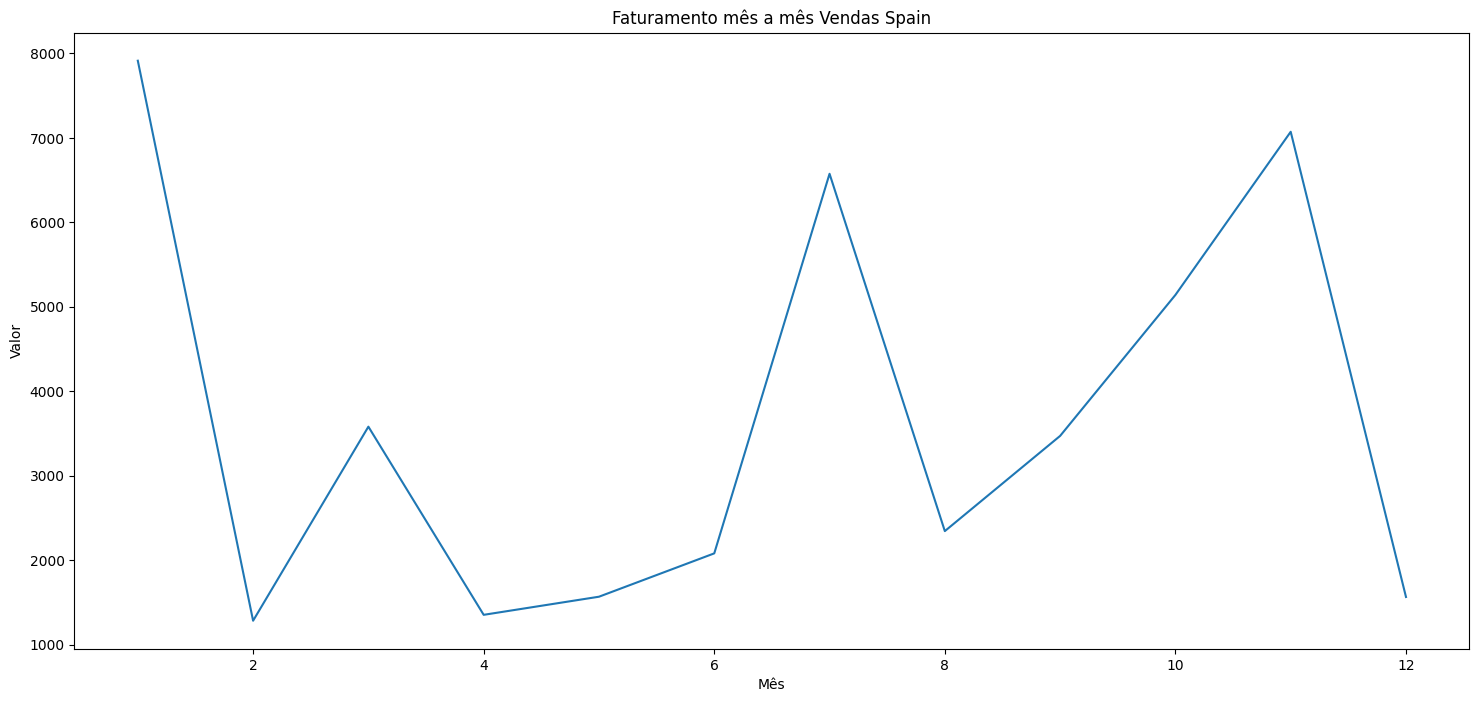

In [ ]:
# Grafico com valor de venda no Spain por mês

plt.figure(figsize=(18,8))
vendas_Spain.plot();

plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Faturamento mês a mês Vendas Spain')

plt.show()

In [ ]:
# Soma da vendas mes no Switzerland

vendas_Switzerland = df[df['Country'] == 'Switzerland'].groupby(df['InvoiceDate'].dt.month)['totalCompra'].sum()

vendas_Switzerland.head(12)

InvoiceDate
1     3555.18
2     1830.42
3     1292.93
4     1377.49
5     2957.11
6     5722.14
7     2238.05
8     3908.19
9     6212.92
10    6112.19
11    6077.36
12    1209.02
Name: totalCompra, dtype: float64

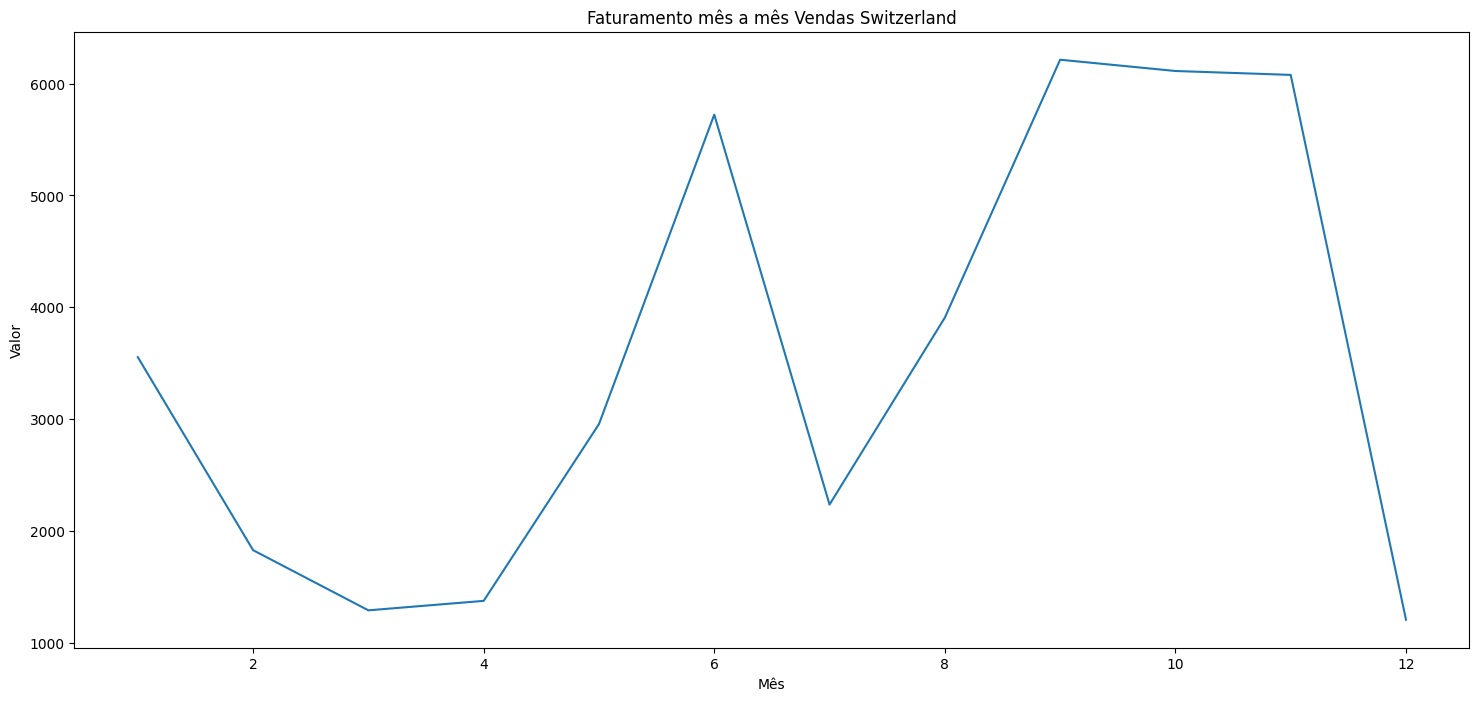

In [ ]:
# Grafico com valor de venda no Switzerland por mês

plt.figure(figsize=(18,8))
vendas_Switzerland.plot();

plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Faturamento mês a mês Vendas Switzerland')

plt.show()

In [ ]:
# Soma da vendas mes no Sweden

vendas_Sweden = df[df['Country'] == 'Sweden'].groupby(df['InvoiceDate'].dt.month)['totalCompra'].sum()

vendas_Sweden.head(12)

InvoiceDate
1     3058.72
2      240.60
3     4680.58
4      608.30
5     2558.98
6      676.00
7     6462.19
8     1143.86
9     4517.21
10    5599.76
11    2071.73
12    3834.30
Name: totalCompra, dtype: float64

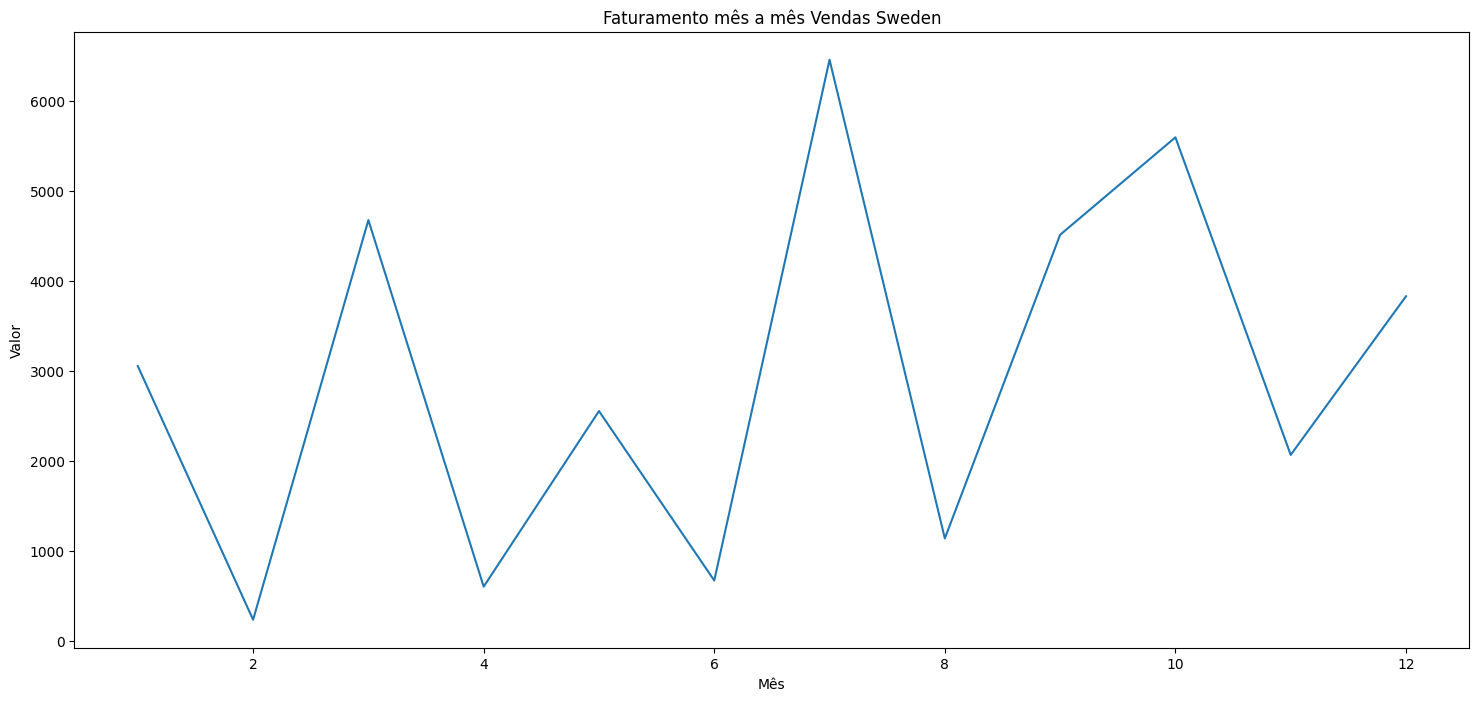

In [ ]:
# Grafico com valor de venda no Sweden por mês

plt.figure(figsize=(18,8))
vendas_Sweden.plot();

plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Faturamento mês a mês Vendas Sweden')

plt.show()

In [ ]:
# Soma da vendas mes no Japan

vendas_japan = df[df['Country'] == 'Japan'].groupby(df['InvoiceDate'].dt.month)['totalCompra'].sum()

vendas_japan.head(12)

InvoiceDate
2     5280.41
3       33.00
4     5814.10
5      863.40
6     1607.04
7     3854.40
9      112.08
10    1948.04
11    7424.78
12    7580.12
Name: totalCompra, dtype: float64

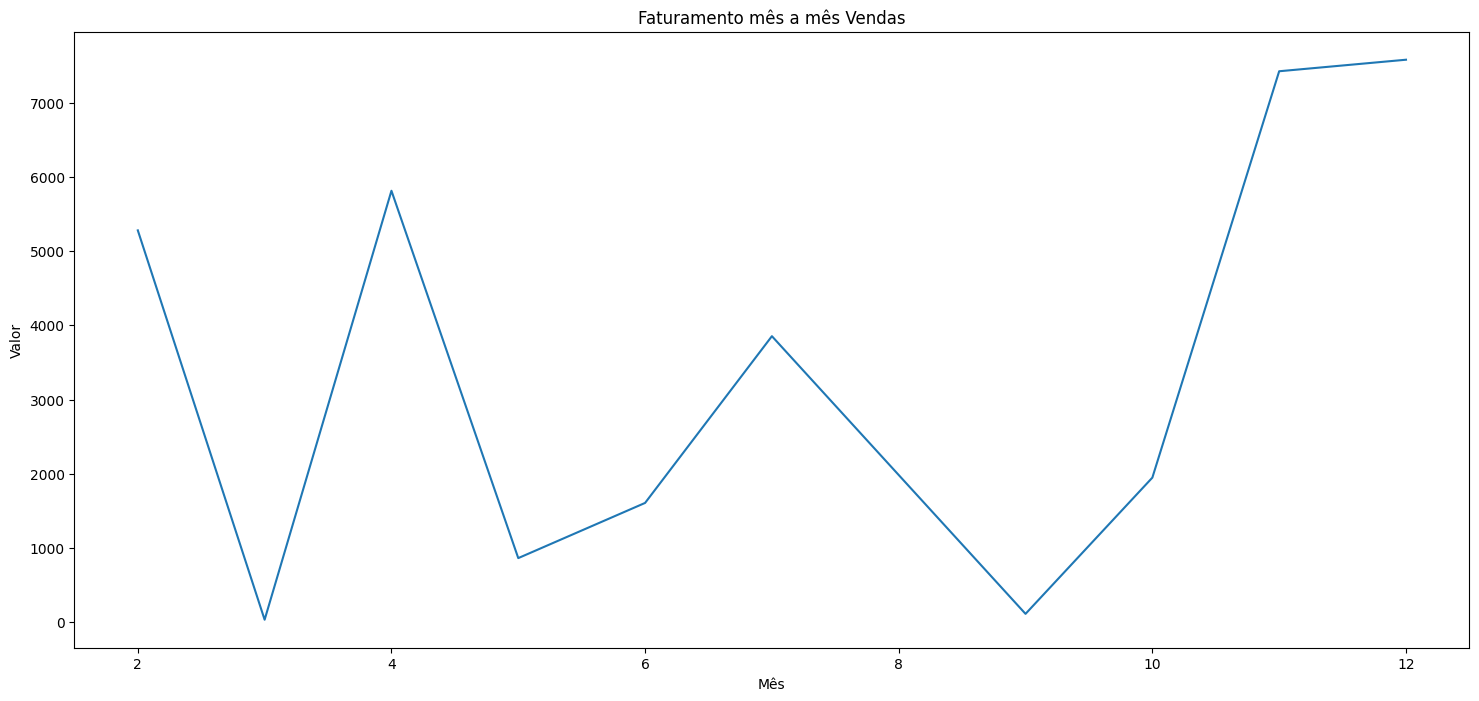

In [ ]:
# Grafico com valor de venda no Japan por mês

plt.figure(figsize=(18,8))
vendas_japan.plot();

plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Faturamento mês a mês Vendas')

plt.show()

In [ ]:
# Agrupando os dados por cliente e pedido/compra (InvoiceNo) e obtenha a data e o preço total do pedido

grupo_pedido = df.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate': 'first', 'totalCompra': 'sum'}).reset_index()

grupo_pedido.head(10)

,CustomerID,InvoiceNo,InvoiceDate,totalCompra
0,12347,537626,2010-12-07 14:57:00,643.15
1,12347,542237,2011-01-26 14:30:00,437.14
2,12347,549222,2011-04-07 10:43:00,598.00
3,12347,556201,2011-06-09 13:01:00,362.62
4,12347,562032,2011-08-02 08:48:00,448.86
5,12347,573511,2011-10-31 12:25:00,1162.22
6,12347,581180,2011-12-07 15:52:00,224.82
7,12348,539318,2010-12-16 19:09:00,652.80
8,12348,541998,2011-01-25 10:42:00,187.44
9,12348,548955,2011-04-05 10:47:00,327.00


In [ ]:
# Agrupando novamente apenas por cliente, calcule o RFM

grupo_cliente = grupo_pedido.groupby('CustomerID').agg({
    'InvoiceDate': 'max',  # Recência - última data de compra
    'InvoiceNo': 'count',  # Frequência - número total de compras
    'totalCompra': 'median'  # ticket médio - a média das compras feitas pelo cliente
}).reset_index()

# Renomeando as colunas para RFM
grupo_cliente.columns = ['CustomerID', 'Recencia', 'Frequencia', 'ticket médio']


grupo_cliente.head(10)

,CustomerID,Recencia,Frequencia,ticket médio
0,12347,2011-12-07 15:52:00,7,448.86
1,12348,2011-09-25 13:13:00,4,298.50
2,12349,2011-11-21 09:51:00,1,1008.10
3,12350,2011-02-02 16:01:00,1,294.40
4,12352,2011-11-03 14:37:00,7,148.95
5,12353,2011-05-19 17:47:00,1,29.30
6,12354,2011-04-21 13:11:00,1,827.40
7,12355,2011-05-09 13:49:00,1,414.00
8,12356,2011-04-08 12:33:00,2,872.30
9,12357,2011-11-06 16:07:00,1,4708.12
